In [1]:
import numpy as np
import matplotlib.pyplot as plt
import mlgrad.af as af
import mlgrad.func as func
import mlgrad.utils as utils
import mlgrad.pca as pca
import pandas as pd
import sklearn.datasets as datasets
import sklearn.decomposition as decomposition
from sklearn.preprocessing import scale

In [2]:
df = pd.read_csv("data/octane.csv", sep=',', index_col='Sample' )
df.dropna(inplace=True)
df

,Material1,Material2,Material3,Condition,Octane
Sample,,,,,
1,55.33,1.72,54,1.66219,92.19
2,59.13,1.20,53,1.58399,92.74
3,57.39,1.42,55,1.61731,91.88
4,56.43,1.78,55,1.66228,92.80
5,55.98,1.58,54,1.63195,92.56
...,...,...,...,...,...
78,67.60,1.84,55,1.64758,91.86
79,64.81,2.24,54,1.69592,91.61
80,63.13,1.60,52,1.66118,92.17


In [3]:
X0 = df.values
X0 = scale(X0)
N = len(X0)
print(N)

82


In [4]:
pca_sk = decomposition.PCA()
pca_sk = pca_sk.fit(X0)

In [5]:
sk_cs = pca_sk.components_
sk_c0 = pca_sk.mean_
sk_a1 = sk_cs[0,:]
sk_a2 = sk_cs[1,:]
U0 = pca_sk.transform(X0)

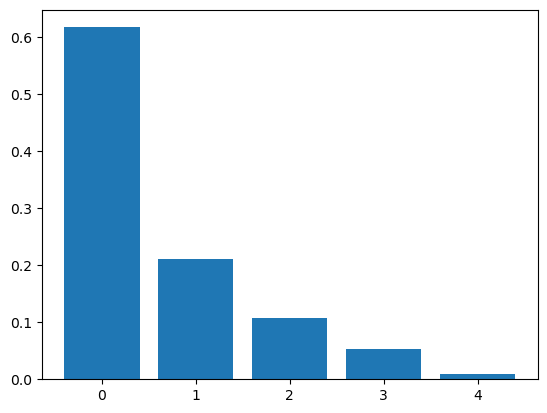

In [6]:
plt.bar(range(X0.shape[1]), pca_sk.explained_variance_ratio_)
plt.show()

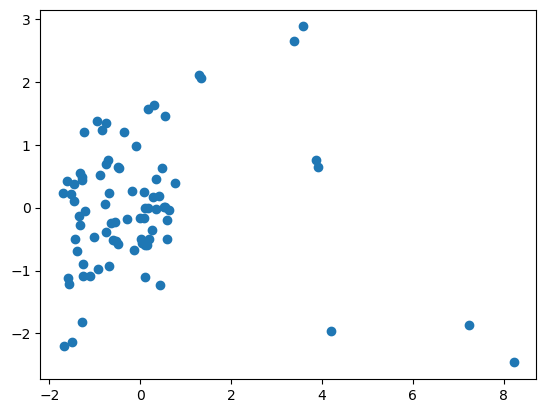

In [7]:
plt.scatter(U0[:,0], U0[:,1])
plt.show()

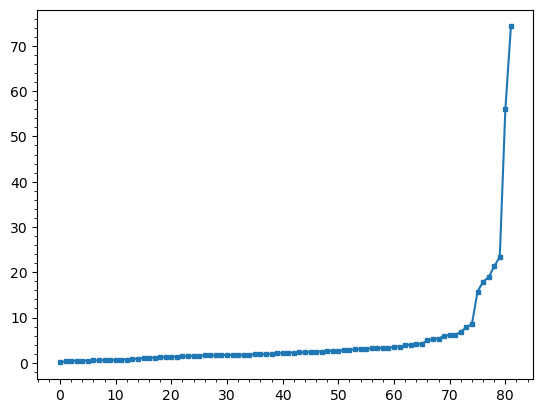

[ 4.45781623e-16 -8.39436921e-17  4.06179155e-16  2.03089578e-17
  4.24118735e-15]


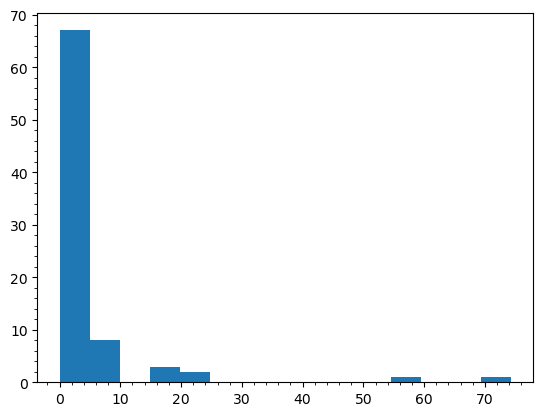

In [8]:
c0 = pca.find_center(X0)
plt.plot(sorted(pca.distance_center(X0, c0)), marker='s', markersize=3)
plt.minorticks_on()
plt.show()
print(c0)
plt.hist(pca.distance_center(X0, c0), bins=15)
plt.minorticks_on()
plt.show()

0.9146341463414634


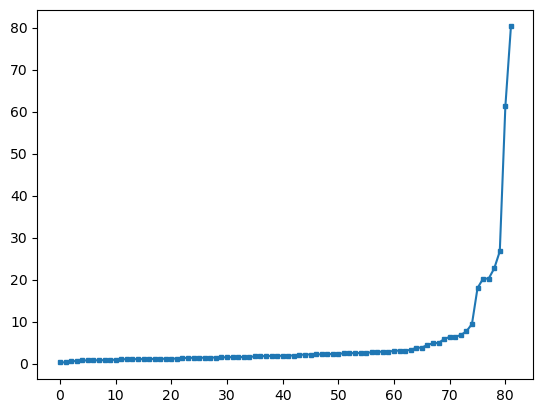

[ 0.22340434 -0.2098619   0.07530071 -0.04567846 -0.14257297]


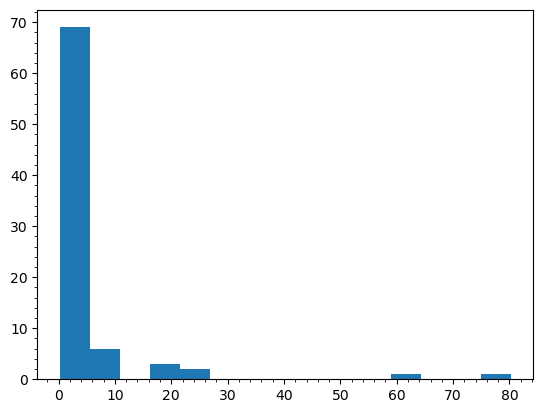

In [9]:
N = len(X0)
alpha = (N - 7) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.001)))
c = pca.find_rob_center(X0, wma)
plt.plot(sorted(pca.distance_center(X0, c)), marker='s', markersize=3)
plt.show()
print(c)
plt.hist(pca.distance_center(X0, c), bins=15)
plt.minorticks_on()
plt.show()

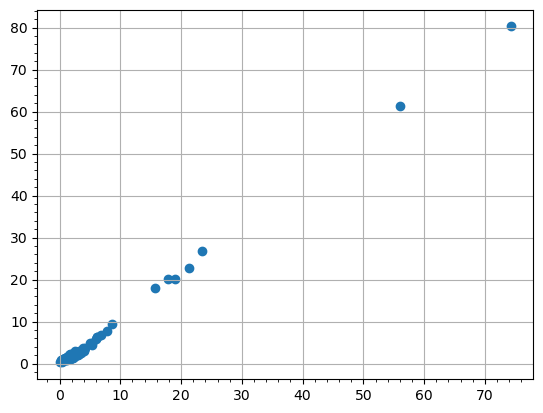

In [10]:
D0 = pca.distance_center(X0, c0)
D1 = pca.distance_center(X0, c)
plt.scatter(D0, D1)
plt.minorticks_on()
plt.grid(1)
plt.show()

In [11]:
X1 = X0 - c
X1_0 = X0 - c0

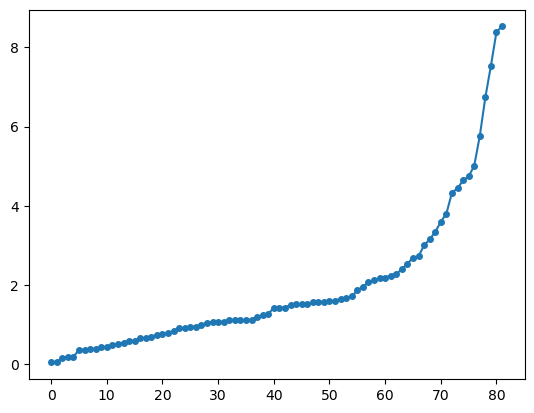

3.0890303948928493 [-0.47855195  0.3314661  -0.45594797  0.41890101  0.52702149]


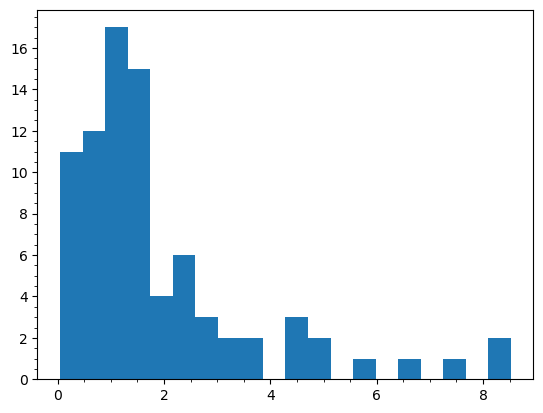

In [12]:
a1_0, L1_0 = pca.find_pc(X1_0)
plt.plot(sorted(pca.distance_line(X1_0, a1_0)), marker='o', markersize=4)
plt.show()
print(L1_0, a1_0)
plt.hist(pca.distance_line(X1_0, a1_0), bins=20)
plt.minorticks_on()


0.9146341463414634


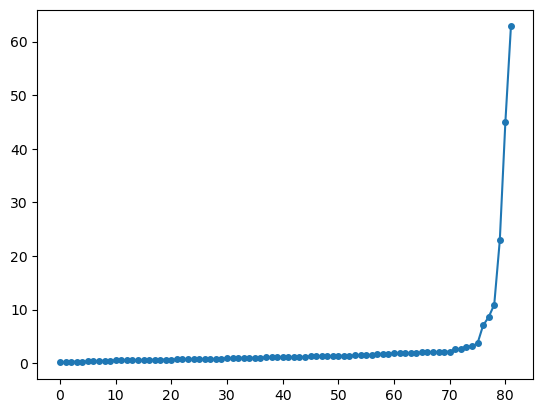

1.4162622637087403 [-0.14726638 -0.31336146 -0.51932817  0.6208903   0.4742475 ]


In [13]:
N = len(X0)
alpha = (N - 7) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.001)))
a1, L1 = pca.find_rob_pc(X1, wma)
plt.plot(sorted(pca.distance_line(X1, a1)), marker='o', markersize=4)
plt.show()
print(L1, a1)
U1 = pca.project_line(X1, a1)
U1_0 = pca.project_line(X1_0, a1_0)

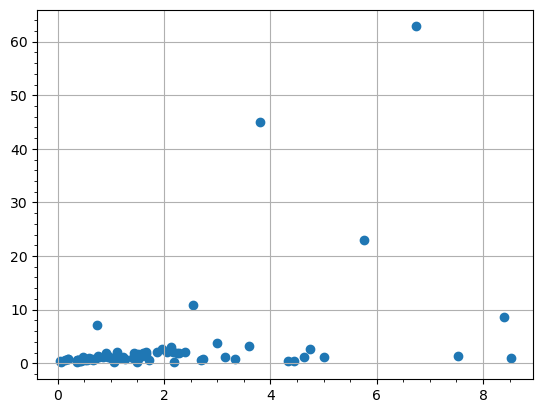

In [14]:
plt.scatter(pca.distance_line(X1_0, a1_0), pca.distance_line(X1, a1))
plt.minorticks_on()
plt.grid(1)
plt.show()

In [15]:
X2 = pca.project(X1, a1)
X2_0 = pca.project(X1_0, a1_0)

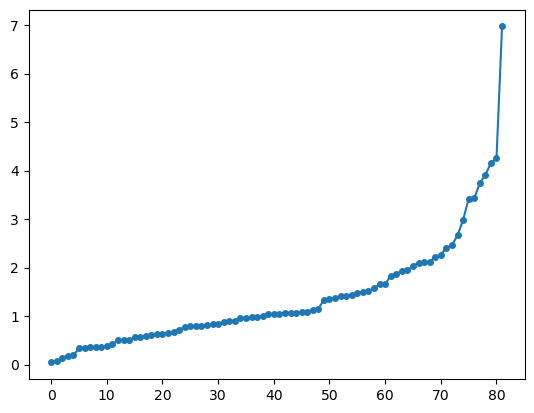

2.1522010887670393 [-0.56552868  0.75762411 -0.09127157 -0.06225938  0.30655551]


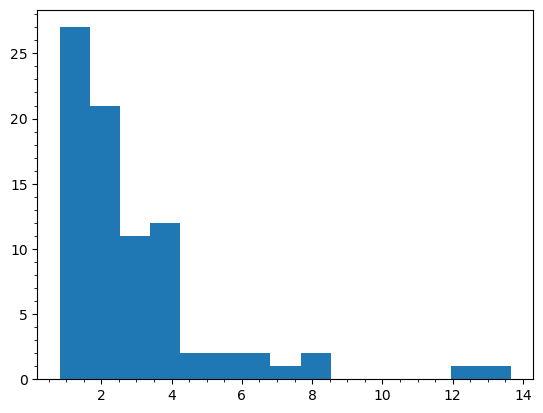

In [16]:
a2_0, L2_0 = pca.find_pc(X2)
plt.plot(sorted(pca.distance_line(X2_0, a2_0)), marker='o', markersize=4)
plt.show()
plt.hist(pca.distance_center(X2_0, a2_0), bins=15)
plt.minorticks_on()

print(L2_0, a2_0)

0.9024390243902439


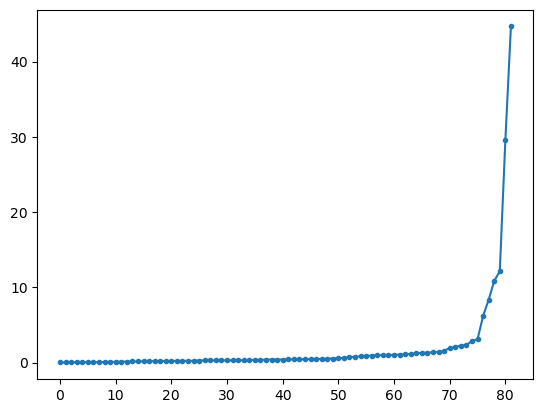

0.5352525042404881 [ 0.68024599 -0.07252961 -0.4531674   0.16390533 -0.54752095]


In [17]:
N = len(X0)
alpha = (N - 8) / N
print(alpha)
wma = af.averaging_function("WM", func.quantile_func(alpha, func.Sqrt(0.001)))
a2, L2 = pca.find_rob_pc(X2, wma)
plt.plot(sorted(pca.distance_line(X2, a2)), marker='o', markersize=3)
plt.show()
print(L2, a2)
U2 = pca.project_line(X2, a2)
U2_0 = pca.project_line(X2_0, a2_0)

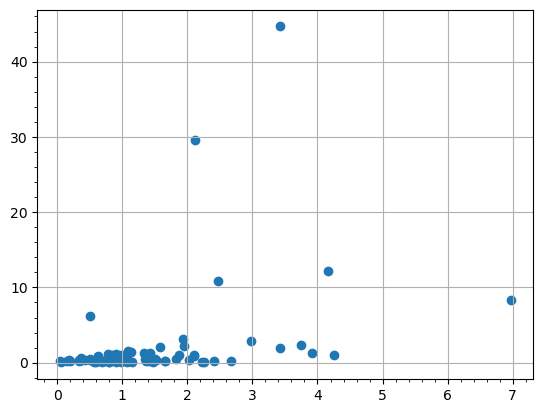

In [18]:
plt.scatter(pca.distance_line(X2_0, a2_0), pca.distance_line(X2, a2))
plt.minorticks_on()
plt.grid(1)
plt.show()

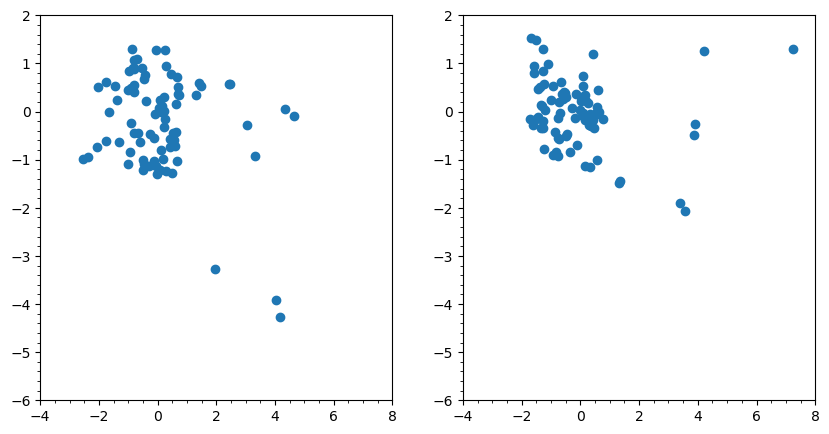

In [24]:
plt.figure(figsize=(10,5))
plt.subplot(2,2,1)
plt.scatter(U1,U2)
plt.xlim(-4,8)
plt.ylim(-6,2)
plt.minorticks_on()
plt.subplot(2,2,2)
plt.subplot(2,2,2)
plt.scatter(U1_0,U2_0)
plt.xlim(-4,8)
plt.ylim(-6,2)
plt.minorticks_on()
plt.show()

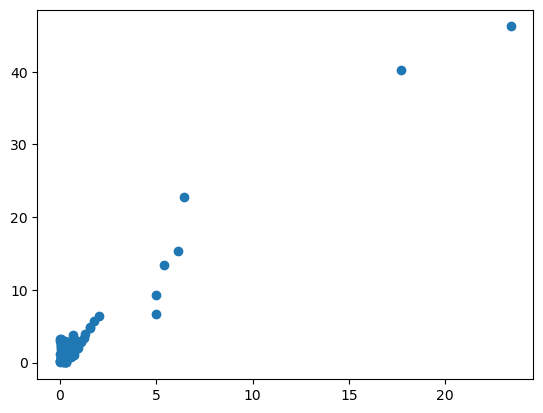

In [20]:
plt.scatter(U1_0**2/L1_0+U2_0**2/L2_0, U1**2/L1+U2**2/L2)

In [ ]:
print(c0, c)

In [ ]:
print(a1_0, a2_0)
print(a1, a2)